<a href="https://colab.research.google.com/github/mr-cri-spy/Deep-Learning-projects/blob/main/MNIST_Hand_Written_Digit_Prediction_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras as tf
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.datasets.mnist
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
print(xtrain[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

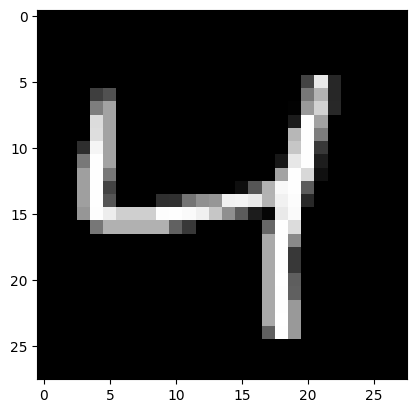

In [ ]:
plt.imshow(xtrain[2],cmap="gray")
plt.show()

In [ ]:
ytrain[100]

5

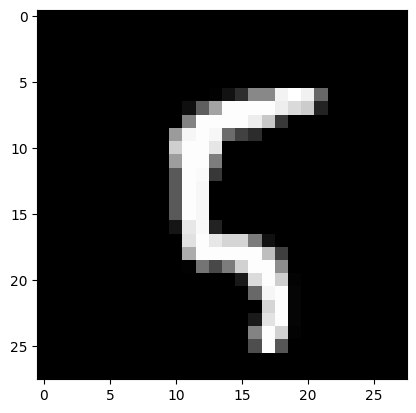

In [ ]:
plt.imshow(xtrain[100],cmap="gray")
plt.show()

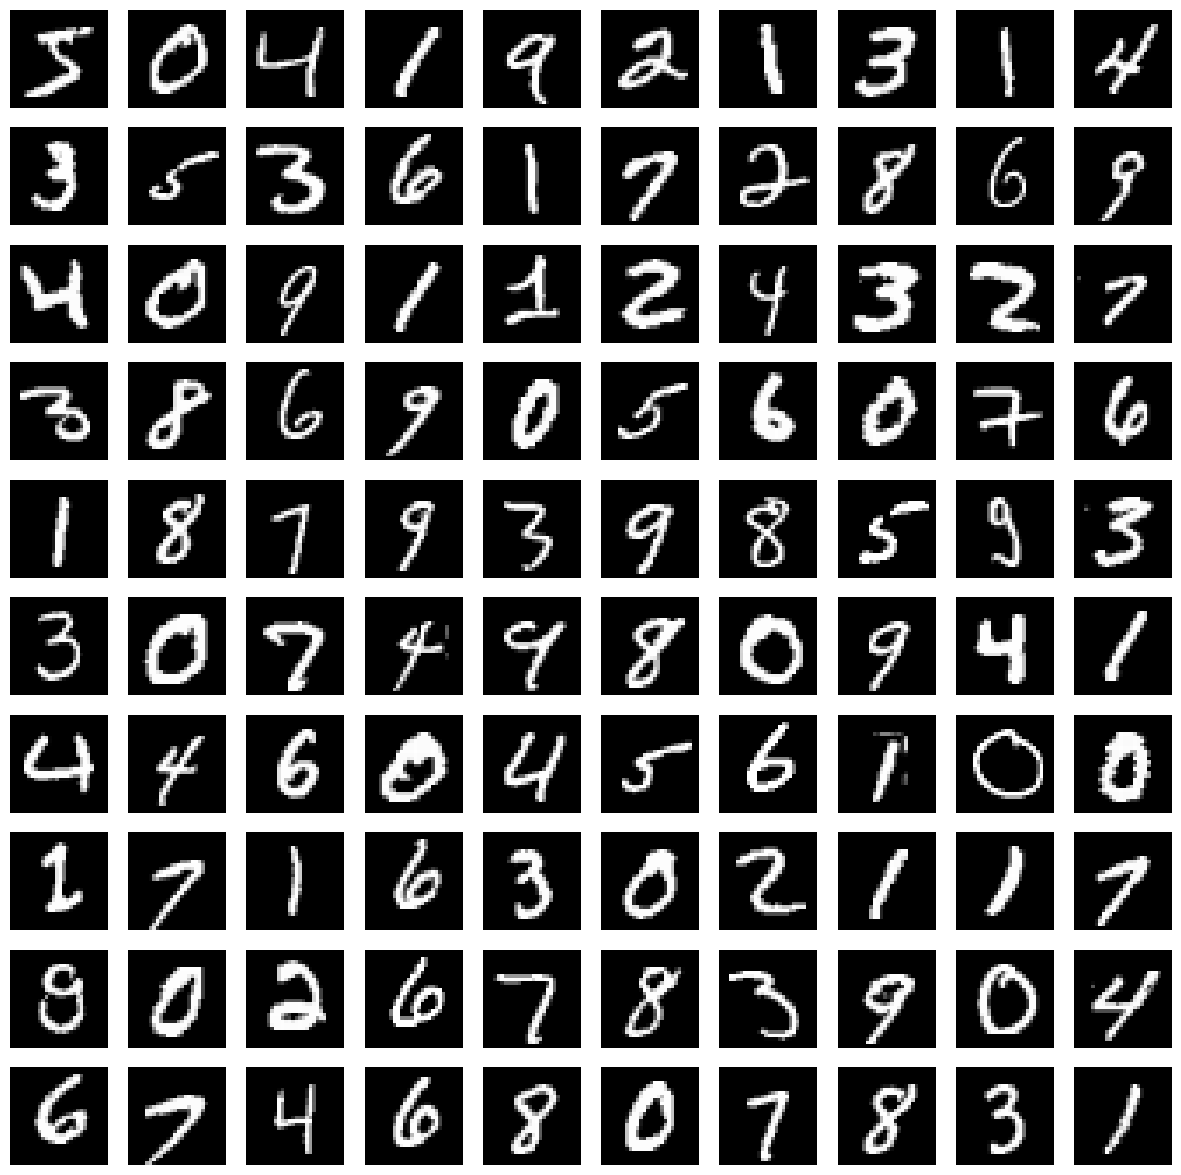

In [ ]:
plt.figure(figsize=(15,15))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.axis("off")
  plt.imshow(xtrain[i],cmap="gray")
plt.show()

In [ ]:
xtrain = xtrain/255
xtest = xtest/255

In [ ]:
### Neural Network

In [ ]:
model = tf.models.Sequential()
model.add(tf.layers.Flatten())
model.add(tf.layers.Dense(32,activation="relu"))
model.add(tf.layers.Dense(32,activation="relu"))
model.add(tf.layers.Dense(10,activation="softmax"))
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(xtrain,ytrain,epochs=15,validation_data=(xtest,ytest))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8228 - loss: 0.6072 - val_accuracy: 0.9449 - val_loss: 0.1873
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9483 - loss: 0.1759 - val_accuracy: 0.9548 - val_loss: 0.1448
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9607 - loss: 0.1329 - val_accuracy: 0.9588 - val_loss: 0.1338
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9698 - loss: 0.1038 - val_accuracy: 0.9649 - val_loss: 0.1189
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9714 - loss: 0.0941 - val_accuracy: 0.9623 - val_loss: 0.1222
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9746 - loss: 0.0818 - val_accuracy: 0.9660 - val_loss: 0.1118
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9793 - loss: 0.0686 - val_accuracy: 0.9667 - val_loss: 0.1054
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9811 - loss: 0.0637 - 

In [ ]:
ypred = model.predict(xtest)
ypred = ypred.argmax(axis=1)
ypred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


7

In [ ]:
ytest[0]

7

In [ ]:
#from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score,confusion_matrix
accu = accuracy_score(ytest,ypred)
accu

0.9697

In [ ]:
cm = confusion_matrix(ytest,ypred)
cm

array([[ 963,    0,    3,    2,    1,    3,    5,    1,    2,    0],
       [   0, 1123,    6,    1,    0,    1,    1,    1,    2,    0],
       [   3,    3, 1004,    3,    1,    0,    7,    9,    2,    0],
       [   0,    1,    7,  985,    0,    9,    0,    6,    1,    1],
       [   1,    4,    4,    1,  937,    3,    4,    5,    1,   22],
       [   3,    0,    2,   22,    0,  846,    7,    0,    4,    8],
       [   9,    1,    3,    2,    2,    8,  931,    1,    1,    0],
       [   2,    4,    9,    1,    1,    0,    0, 1007,    0,    4],
       [   6,    0,    8,   17,    1,    6,    1,    4,  922,    9],
       [   3,    3,    0,    6,    5,    6,    1,    4,    2,  979]])

In [ ]:
#import numpy as np
#a = [10,200,10,50,10]
#np.argmax(a)

1

In [ ]:
import cv2
import numpy as np

(28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Digit : 2


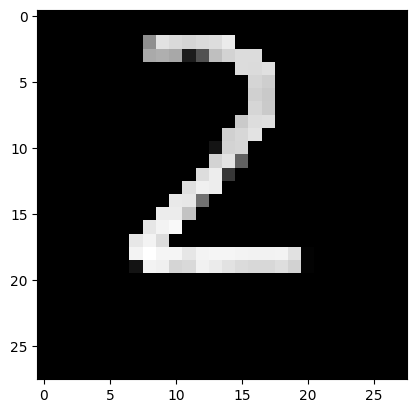

In [ ]:
img = cv2.imread("/content/2.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(28,28))
img = cv2.bitwise_not(img)
print(img.shape)
print("Predicted Digit :",np.argmax(model.predict(np.array([img]))))
plt.imshow(img,cmap="gray")
plt.show()

(28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted Digit : 3


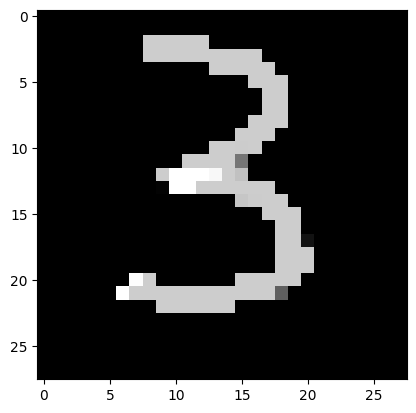

In [ ]:
img = cv2.imread("/content/3.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(28,28))
img = cv2.bitwise_not(img)
print(img.shape)
print("Predicted Digit :",np.argmax(model.predict(np.array([img]))))
plt.imshow(img,cmap="gray")
plt.show()

In [ ]:
## Precision | Recall | F1-Score